<a href="https://colab.research.google.com/github/romenlaw/NaiveNeuralNetwork/blob/main/tests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Git

In [1]:
!git config --global user.name "romenlaw"
!git config --global user.email "e"
TOKEN='github_pat_'
!git clone https://$TOKEN@github.com/romenlaw/NaiveNeuralNetwork

Cloning into 'NaiveNeuralNetwork'...
remote: Enumerating objects: 158, done.
remote: Counting objects: 100% (14/14), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 158 (delta 5), reused 6 (delta 3), pack-reused 144
Receiving objects: 100% (158/158), 387.12 KiB | 2.83 MiB/s, done.
Resolving deltas: 100% (71/71), done.


In [2]:
%cd /content/NaiveNeuralNetwork

/content/NaiveNeuralNetwork


In [17]:
!git status

On branch main
Your branch is ahead of 'origin/main' by 1 commit.
  (use "git push" to publish your local commits)

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/

nothing added to commit but untracked files present (use "git add" to track)


In [15]:
!git add nnn.py visualiser.py __init__.py
!git status

On branch main
Your branch is up to date with 'origin/main'.

Changes to be committed:
  (use "git restore --staged <file>..." to unstage)
	modified:   nnn.py

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	__pycache__/



In [ ]:
!git reset

Unstaged changes after reset:
M	__pycache__/nnn.cpython-310.pyc
M	nnn.py
M	visualiser.py


In [16]:
!git commit -m "add non-linearity to Neuron"

[main 683a27d] add non-linearity to Neuron
 1 file changed, 8 insertions(+), 5 deletions(-)


In [18]:
!git push origin main

Enumerating objects: 5, done.
Counting objects: 100% (5/5), done.
Delta compression using up to 2 threads
Compressing objects: 100% (3/3), done.
Writing objects: 100% (3/3), 439 bytes | 439.00 KiB/s, done.
Total 3 (delta 2), reused 0 (delta 0), pack-reused 0
remote: Resolving deltas: 100% (2/2), completed with 2 local objects.
To https://github.com/romenlaw/NaiveNeuralNetwork
   9eaf6c5..683a27d  main -> main


# Housekeeping

In [ ]:
!pwd

/content/NaiveNeuralNetwork


In [4]:
import sys
sys.path.append('/content/NaiveNeuralNetwork')

%load_ext autoreload
%autoreload 2

In [5]:
from nnn import *
from visualiser import *


# Visualise

In [ ]:
a=Scalar(2., label='a')
b=Scalar(-3, label='b')
c=Scalar(10, label='c')
e=a*b; e.label='e'
d=e+c+b; d.label='d'
f=d/e; f.label='f'
L=(-f).relu(); L.label='L'


In [ ]:
L.backward()

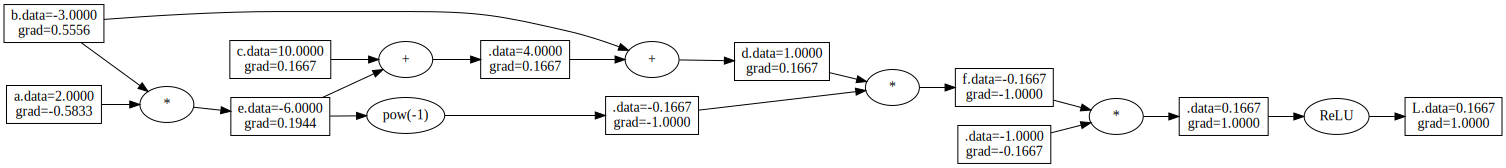

In [ ]:
visualise(L)

# Gradient

In [111]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['axes.grid'] = True
plt.rcParams['figure.figsize'] = (5,3)

In [ ]:
def f(x):
  return 3*x**2 - 4 * x + 5

In [ ]:
f(2.0)

9.0

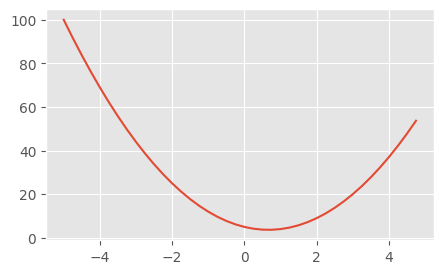

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = f(xs)
plt.plot(xs, ys)

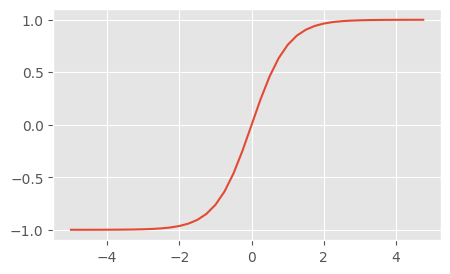

In [ ]:
xs = np.arange(-5, 5, 0.25)
ys = np.tanh(xs)
plt.plot(xs, ys)

The definition of [derivitive](https://en.wikipedia.org/wiki/Derivative) as a limit is that
$$L=\lim_{h \to 0} \dfrac{f_{(a+h)} - f_{(h)}} {h}$$

In [ ]:
h=1e-7
a=2.0
(f(a+h)-f(a))/h

8.000000288888032

Numerically check against the Scalar backward() results.

In [ ]:
def lol():
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L1=f.data


  h=1e-4
  a=Scalar(2., label='a')
  b=Scalar(-3, label='b')+h
  c=Scalar(10, label='c')
  e=a*b; e.label='e'
  d=e+c+b; d.label='d'
  f=d*e; f.label='f'
  L2=f.data

  print((L2-L1)/h)

lol()

-15.999400000037411


# Test with MLP

In [ ]:
import torch

In [ ]:
x1 = torch.Tensor([2.0]).double().requires_grad_(True)
x2 = torch.Tensor([0.0]).double().requires_grad_(True)
w1 = torch.Tensor([-3.0]).double().requires_grad_(True)
w2 = torch.Tensor([1.0]).double().requires_grad_(True)
b = torch.Tensor([6.8813735870195432]).double().requires_grad_(True)
n = x1*w1 + x2*w2 + b
o = torch.tanh(n)
print(o.data.item())
o.backward()
print('---')
print('x2', x2.grad.item())
print('w2', w2.grad.item())
print('x1', x1.grad.item())
print('w1', w1.grad.item())

0.7071066904050358
---
x2 0.5000001283844369
w2 0.0
x1 -1.5000003851533106
w1 1.0000002567688737


In [83]:
from nnn import *

In [28]:
X = [0.3, -2.7, 2.5]
mlp = MLP(3, [2,1])
mlp(X)


o(L1,0): 0.18417589247859845

In [42]:
mlp.layers[1].neurons[0]

Neuron(1, 0) is linear

In [23]:
mlp.parameters()

[w(L0,0,I0): 0.9388544559873178,
 w(L0,0,I1): -0.3832593892852567,
 w(L0,0,I2): -0.8948179259791473,
 b(L0,0): -0.47161648832074676,
 w(L0,1,I0): 0.13330757713905084,
 w(L0,1,I1): 0.03588149521178585,
 w(L0,1,I2): 0.7802948818400459,
 b(L0,1): -0.4623917570351568,
 w(L1,0,I0): -0.4587288171991324,
 w(L1,0,I1): 0.6877286342061599,
 b(L1,0): 0.24003169386991052]

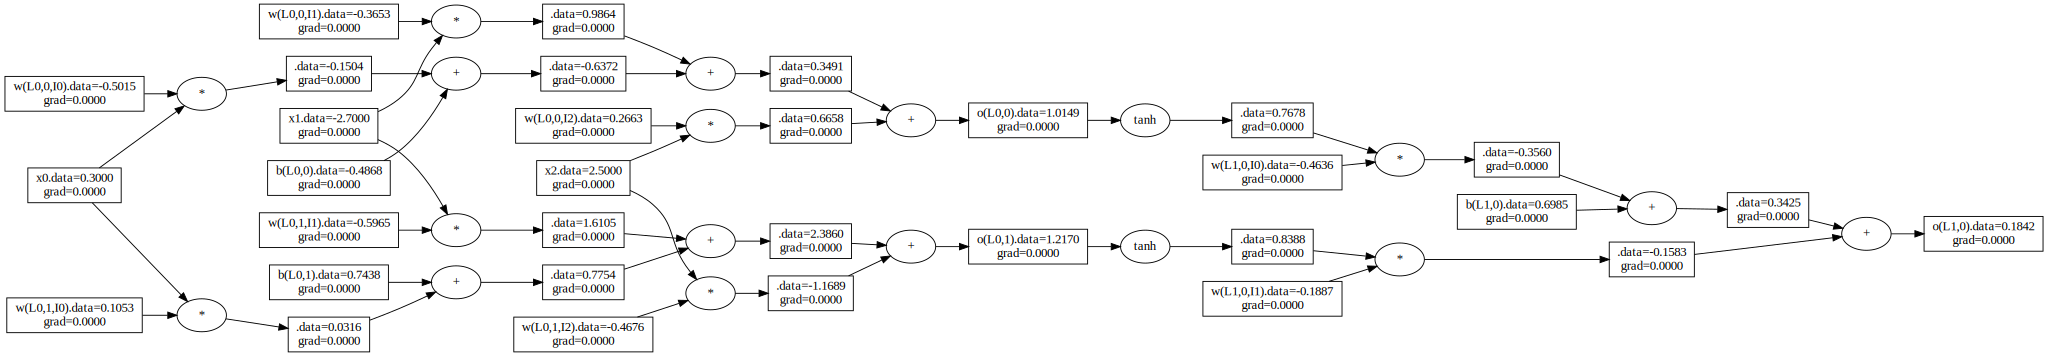

In [43]:
visualise(mlp(X))

In [57]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])
y_pred = [mlp(x) for x in batch_x]
y_pred

[o(L2,0): -0.7323917619946334 ; grad: 0.0,
 o(L2,0): -0.32306326875896907 ; grad: 0.0,
 o(L2,0): -0.7862529062925345 ; grad: 0.0,
 o(L2,0): -0.3946943837124156 ; grad: 0.0]

Iterating the cells below to see the loss decrease and the y_pred get closer and closer to the ground truth batch_y.

In [64]:
loss = [(y_pred[i]-batch_y[i])**2 for i in range(len(batch_y))];
loss

[: 0.12161587439491345 ; grad: 0.0,
 : 1.1423912856873548 ; grad: 0.0,
 : 1.3172961093572702 ; grad: 0.0,
 : 0.0097737819608882 ; grad: 0.0]

In [65]:
loss = sum(loss); loss.label='loss'
loss

loss: 2.5910770514004264 ; grad: 0.0

In [66]:
mlp.zero_grad()
loss.backward()

In [67]:
for p in mlp.parameters():
  p.data += -0.05 * p.grad

In [68]:
y_pred = [mlp(x) for x in batch_x]
y_pred

[o(L2,0): 0.03908006610826469 ; grad: 0.0,
 o(L2,0): -0.8484371977870181 ; grad: 0.0,
 o(L2,0): -0.6342138510773754 ; grad: 0.0,
 o(L2,0): 0.49163241114650474 ; grad: 0.0]

In [69]:
mlp.parameters()

[w(L0,0,I0): 0.007355569306717158 ; grad: 3.103244932498236,
 w(L0,0,I1): 0.2853626579227034 ; grad: 0.06246281291304376,
 w(L0,0,I2): -0.6441256333543184 ; grad: 1.4568170768626112,
 b(L0,0): 0.5293415095797328 ; grad: 1.8515897623969921,
 w(L0,1,I0): 0.08011369974505857 ; grad: -1.952052927602851,
 w(L0,1,I1): -0.4172455740416888 ; grad: -0.015873930437945126,
 w(L0,1,I2): 0.5205456191274951 ; grad: -0.9172031341532425,
 b(L0,1): -0.5712172912105214 ; grad: -1.1532518413397814,
 w(L0,2,I0): -0.5020123001220793 ; grad: -0.02572152830664452,
 w(L0,2,I1): 0.23876068605501533 ; grad: 0.005824153265566866,
 w(L0,2,I2): -0.532993784233391 ; grad: 0.0808199035342881,
 b(L0,2): 0.2479630764517145 ; grad: 0.021311797286053348,
 w(L0,3,I0): -0.5382940319324979 ; grad: 0.5973775808092241,
 w(L0,3,I1): -0.5924539305956242 ; grad: -0.10737864126584387,
 w(L0,3,I2): -0.7853134742362239 ; grad: 0.40674011360433004,
 b(L0,3): 0.4518807848707058 ; grad: 0.39176280185658374,
 w(L1,0,I0): -0.3621337111

Interesting thing about the following graph: since tanh() is used as activation, and the y values are -1 or 1, the gradients of tanh() are all zeros.

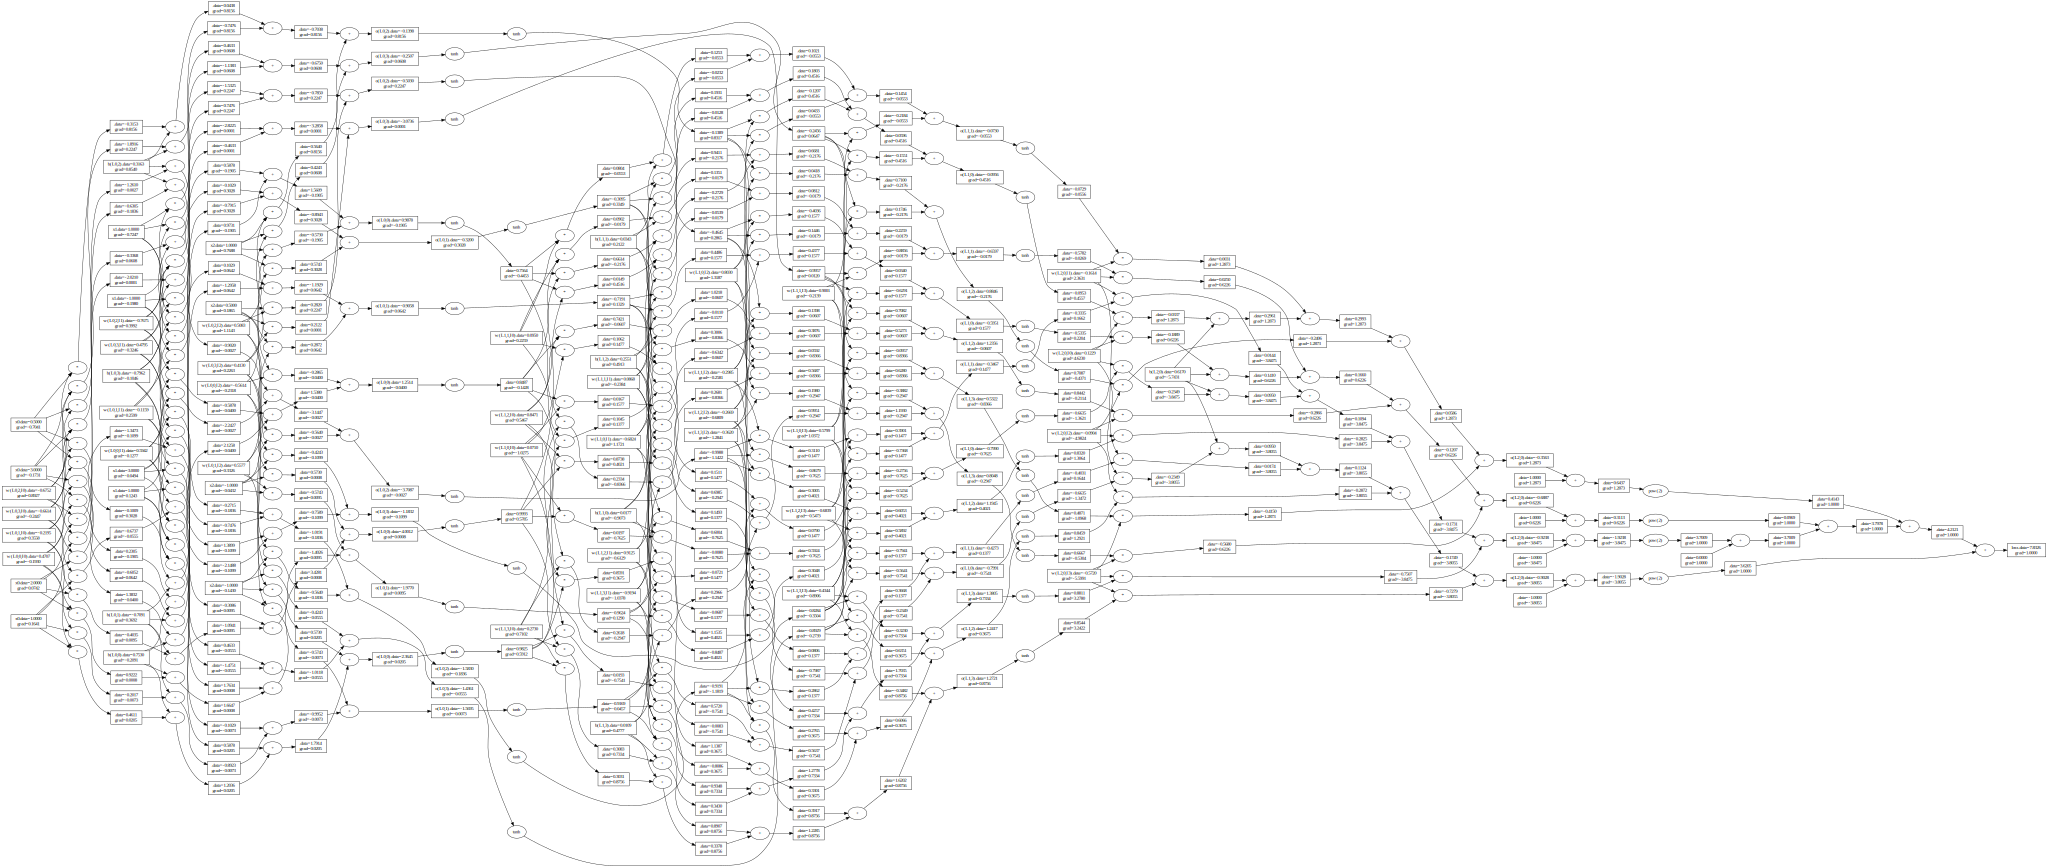

In [52]:
visualise(loss)

Putting the above together in a loop

In [114]:
batch_x = [
    [2.0, 3.0, -1.0],
    [3.0, -1.0, 0.5],
    [0.5, 1.0, 1.0],
    [1.0, 1.0, -1.0]
]

batch_y = [1.0, -1.0, -1.0, 1.0] # ground true of y

mlp = MLP(3, [4,4,1])

In [115]:
losses=[]
batch_size=300
for i in range(batch_size):
  # forward pass
  y_pred = [mlp(x) for x in batch_x]
  loss = sum([(y_pred[i]-batch_y[i])**2 for i in range(len(batch_x))])

  losses.append(loss)

  # backward pass
  mlp.zero_grad()
  loss.backward()

  # update parameters
  for p in mlp.parameters():
    p.data += -0.01 * p.grad

  if i%50 == 0:
    print(f"{i}: loss={loss.data}")

0: loss=10.908694400288809
50: loss=0.018289802275017933
100: loss=0.0012956100899897066
150: loss=0.00012823081648593015
200: loss=2.0052640102252223e-05
250: loss=3.7483849071720497e-06


In [116]:
y_pred

[o(L2,0): 1.0002585104278081 ; grad: 0.0005170208556162237,
 o(L2,0): -0.999511511928022 ; grad: 0.0009769761439559765,
 o(L2,0): -1.0005480341373865 ; grad: -0.0010960682747729322,
 o(L2,0): 0.9996113770421595 ; grad: -0.0007772459156809575]

In [108]:
mlp.parameters()

[w(L0,0,I0): 0.2628775461558549 ; grad: 0.0018561236759890353,
 w(L0,0,I1): 0.5172037175920333 ; grad: -0.0018326077861741145,
 w(L0,0,I2): 0.8649478408392973 ; grad: -0.0007801037868784988,
 b(L0,0): 0.08500011223524678 ; grad: -0.00011737308871609106,
 w(L0,1,I0): 0.007735596212335236 ; grad: 0.0001080825258456717,
 w(L0,1,I1): 0.1604336402241707 ; grad: -2.650741795904416e-06,
 w(L0,1,I2): -0.9485638993634831 ; grad: 0.0003554999551778805,
 b(L0,1): 0.7165841497423933 ; grad: -0.00024063680544485482,
 w(L0,2,I0): -0.40094098977241954 ; grad: 0.0003348334154143796,
 w(L0,2,I1): 0.8709945675336795 ; grad: 0.0007257624824172016,
 w(L0,2,I2): 0.7562132426276758 ; grad: 0.000768785329032602,
 b(L0,2): 0.7474979149000681 ; grad: 0.0006565940258557169,
 w(L0,3,I0): -0.5126567292304536 ; grad: 4.719453994843395e-05,
 w(L0,3,I1): -0.17358359782845176 ; grad: 9.43890798968679e-05,
 w(L0,3,I2): 0.9684286593262713 ; grad: 9.43890798968679e-05,
 b(L0,3): 0.3015296101922944 ; grad: 9.438907989686

this graph is using relu() for non-linear

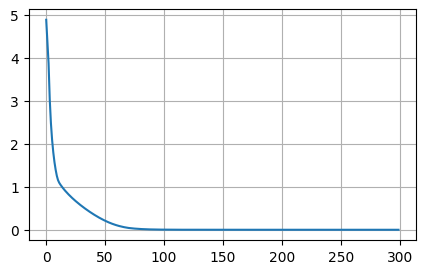

In [113]:
xs=[i for i in range(batch_size)]
plt.plot(xs, [l.data for l in losses])
#plt.yscale('log')
#plt.xscale('log')

This graph is using tanh() for non-linear

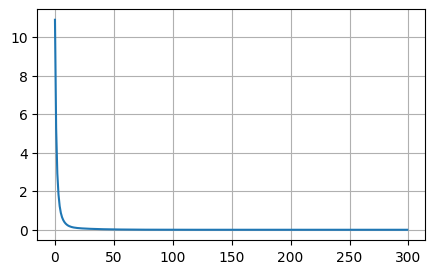

In [120]:
xs=[i for i in range(batch_size)]
plt.plot(xs, [l.data for l in losses])
#plt.yscale('log')
#plt.xscale('log')